In [1]:
%run create_model.py
import numpy as np
import matplotlib.pyplot as plt

'' is not a valid SBML 'SId'.


In [2]:
model.metabolites.FPP.reactions

frozenset({<Reaction ADS_reaction at 0x1f0657e0b50>,
           <Reaction r2005 at 0x1f0777fbb20>,
           <Reaction r868 at 0x1f0777d7df0>,
           <Reaction r869 at 0x1f0777d7fa0>})

In [4]:
print('BM production complete model: ', model.optimize())
with model:
    model.reactions.r2005.knock_out()
    print('r2005 knocked out: ', model.optimize())

BM production complete model:  <Solution 0.940 at 0x1f0789e0f10>
r2005 knocked out:  <Solution 0.940 at 0x1f0789e0fa0>


In [5]:
print('BM production complete model: ', model.optimize())
with model:
    model.reactions.r868.knock_out()
    print('r868 knocked out: ', model.optimize())

BM production complete model:  <Solution 0.940 at 0x1f065774dc0>
r868 knocked out:  <Solution 0.000 at 0x1f0657bfa60>


In [6]:
print('BM production complete model: ', model.optimize())
with model:
    model.reactions.r869.knock_out()
    print('r869 knocked out: ', model.optimize())

BM production complete model:  <Solution 0.940 at 0x1f0657bfee0>
r869 knocked out:  <Solution 0.000 at 0x1f06586ebe0>


In [8]:
#find maximum BM flux without any product flux
model.optimize().objective_value
BM_max = model.optimize().objective_value
print('Value Biomass production (Flux): ', BM_max)

#divide BM_max into 10 parts and iterate over it, setting the lower boundary
#of BM flux to cumulative sum of parts.
#array_biomass = np.arange(0, BM_max, BM_max/10)
array_biomass = np.linspace(0, BM_max, num=10)
array_secretion = []
BM_reaction = Reaction('DRAIN_Biomass')

#array_secretion[0] = 9
#print(array_biomass)
#print(array_secretion)

#now build PPP with knock out reaction
for i in array_biomass:
    with model:
        model.reactions.r2005.knock_out()
        model.reactions.DRAIN_Biomass.bounds = i, 1000
        model.objective = model.reactions.ARTA_ex
        solution = model.optimize()    
        array_secretion.append(solution.fluxes.ARTA_ex)
        #print(model.optimize().objective_value)
        print(model.reactions.DRAIN_Biomass.bounds)

print(array_secretion)


Value Biomass production (Flux):  0.9398547241492076
(0.0, 1000.0)
(0.10442830268324528, 1000)
(0.20885660536649056, 1000)
(0.31328490804973586, 1000)
(0.4177132107329811, 1000)
(0.5221415134162264, 1000)
(0.6265698160994717, 1000)
(0.7309981187827169, 1000)
(0.8354264214659622, 1000)
(0.9398547241492076, 1000)
[2.808134394341276, 2.496119461636692, 2.1841045289321874, 1.8720895962276312, 1.5600746635230467, 1.2480597308183865, 0.9360447981138267, 0.6240298654092915, 0.3120149327047201, 1.4061484198202717e-13]


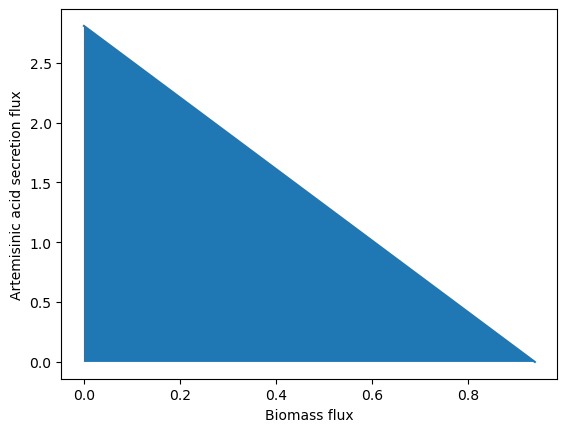

In [9]:
fig = plt.plot(array_biomass, array_secretion,)

plt.xlabel('Biomass flux')            
plt.ylabel('Artemisinic acid secretion flux')
plt.fill_between(array_biomass, array_secretion)